In [71]:
# Importar librerias
import os
import requests
import pandas as pd
import requests
import missingno as msno
from sklearn.model_selection import train_test_split

## Visualizar csv

In [72]:
df = pd.read_csv("/workspaces/steven10015-intro-ml/data/raw/airbnb.csv").iloc[:,1:]
df.set_index("host_id", inplace = True)
pd.set_option('display.max_columns', None)
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
2787,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2845,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
4632,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4869,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
7192,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [73]:
# Visualizar tamaño previo a la limpieza 
df.shape

(48895, 14)

## Limpieza del csv

In [74]:
# Visualizar si hay columnas con un valor unico multiplicado
unicos = df.nunique()
df[unicos[unicos==1].index]
# df.drop(unicos[unicos==1].index, axis=1, inplace=True), se omite, al no haber columnas de esas características.

""
host_id
2787
2845
4632
4869
7192
...
8232441
6570630
23492952


## Observar filas duplicadas, identicas

In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
# Aqui con T invertimos el dataframe, para ver columnas duplicadas
df.T.duplicated().sum()

np.int64(0)

## No hay columnas redundantes a la vista

En algunas ocasiones habrán grupos de columnas muy específicas, las cuales podemos borrar ya que se pueden deducir sus datos a partir de las otras. Ejemplo: Casa_este, Casas_oeste, Casas_norte, Casas_sur; puedes borrar alguna sin problema y así reducir el peso del dataset.

## No hay columnas data leakeage

Se considera data leakeage cuando una variable que tenemos presente (en forma de columna) es nuestro objetivo de investigación o consideramos que pueda interferir con este. Por ejemplo, el precio por metro cuadrado de una vivienda, si nuestro objetivo es predecir los precios.

## Visualizar columnas con datos faltantes

In [77]:
col_datos_faltantes = df.isna().mean()*100
# [col_datos_faltantes > 0], esta parte del código genera booleanos, es una condición.
col_datos_faltantes[col_datos_faltantes>0] # Solo nos mostrará las columnas con na.

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

No se observan una gran cantidad de datos faltantes, menor al 25% podría considerar aceptable.

## Visualizar cuantas filas tienen datos faltantes

In [ ]:
fila_datos_faltantes = df.isna().any(axis=1).sum() # any sirve para ver CUALQUIER dato faltante
fila_datos_faltantes[fila_datos_faltantes>0] # primer tipo de código para ver estas condiciones

array([10074])

In [ ]:
n = 2 # segundo tipo de código, se probaron varios números, 2 fue el primero con na
df[df.isna().sum(axis=1) > n] # se los visualiza, su sintaxis es seleccionar valores/dividirlos por col.fila/condición para mostrarlos.

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
6676776,NaN,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
23077718,Charming Room in Prospect Heights!,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
21600904,NaN,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
1832442,NaN,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
24625694,NaN,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
31147528,NaN,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
5162530,1 Bedroom in Prime Williamsburg,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
50448556,NaN,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
37306329,NaN,Juliette,Manhattan,Chinatown,40.71632,-73.99328,Private room,67,4,0,NaN,NaN,1,0


In [80]:
df_2na = df[df.isna().sum(axis=1) > n] # se guarda para ver tamaño
df_2na.shape

(15, 14)

In [ ]:
# Al ser pocas filas no se pierde tanto al eliminarlas y podemos tener resultados un poco más limpios(balance)
df = df[df.isna().sum(axis = 1) <= n] # Se filtra df, nos quedamos con las filas que tienen 1 o 0 na

<Axes: >

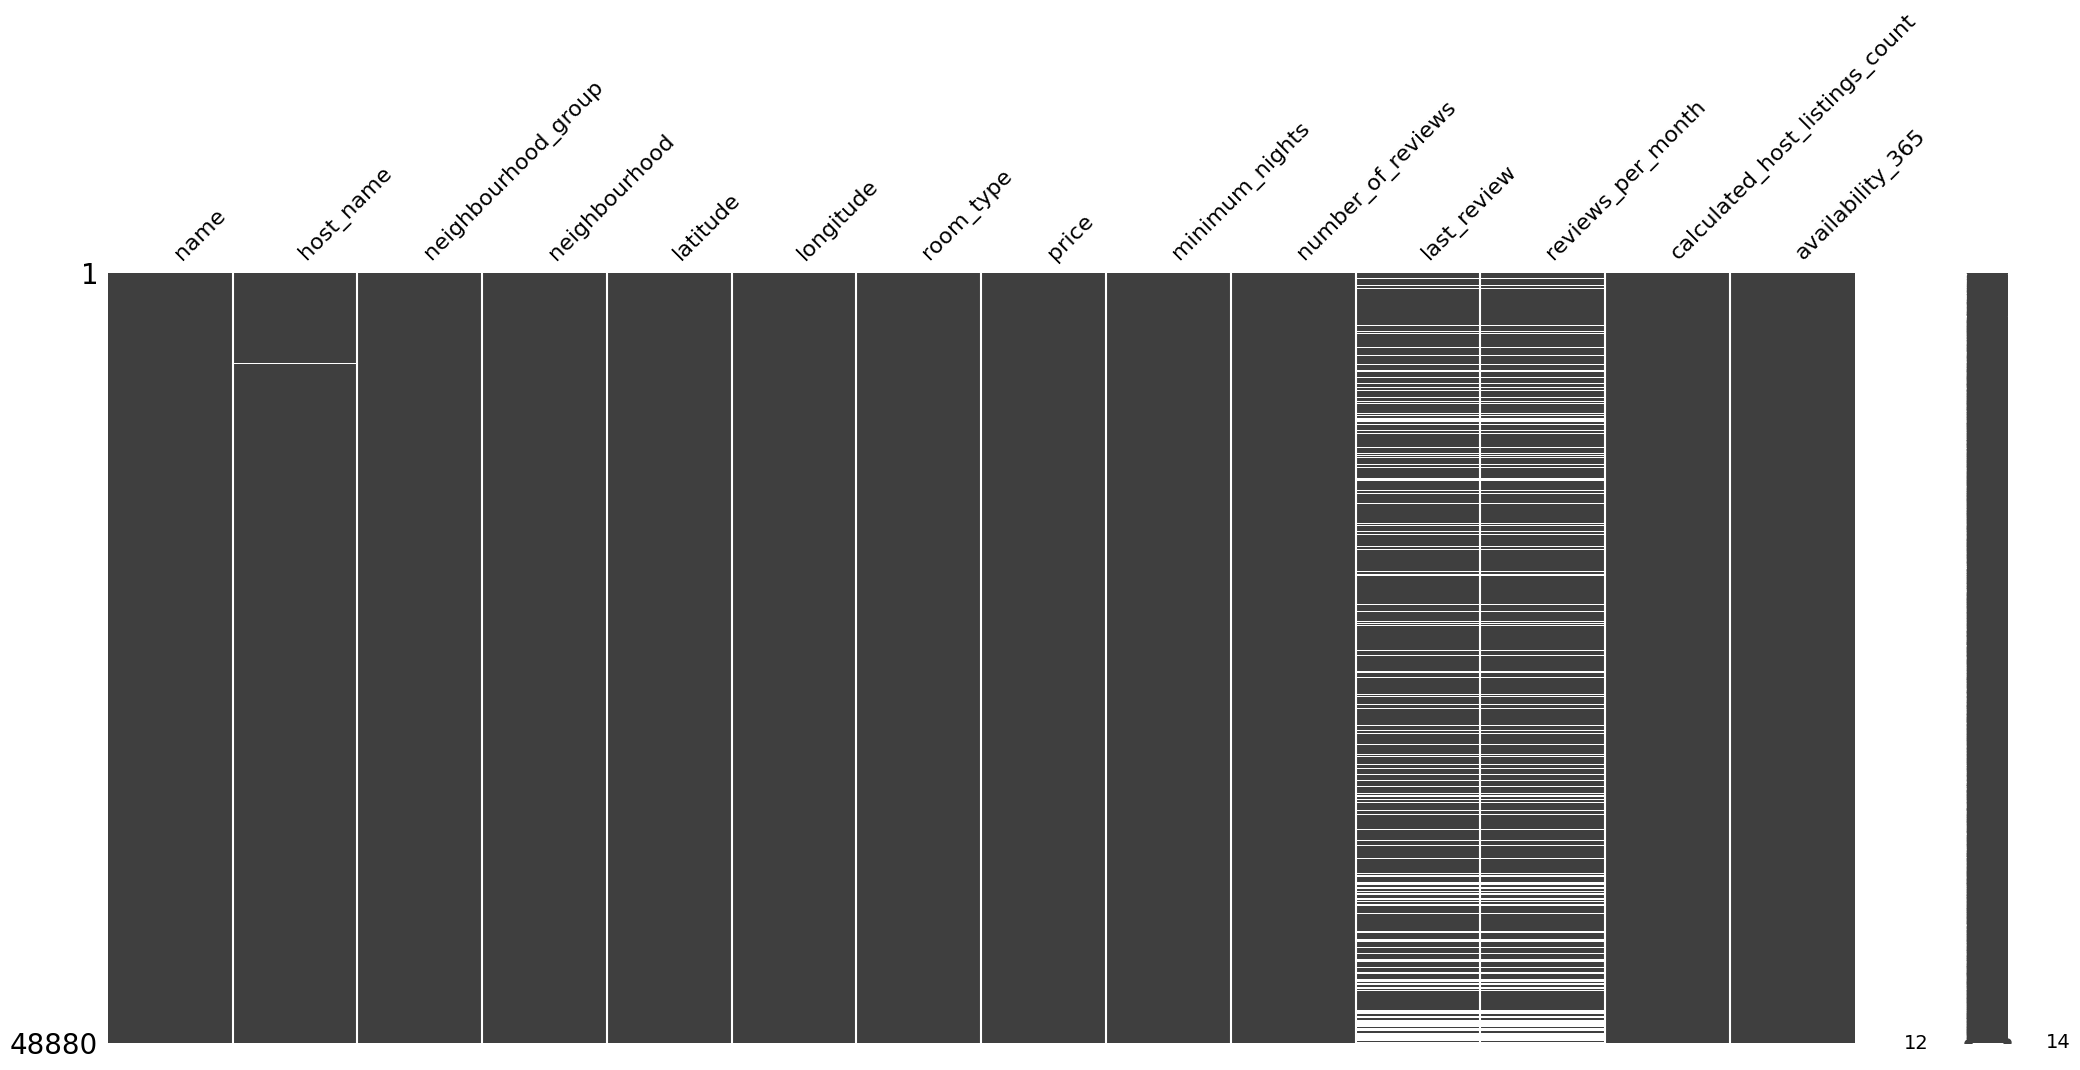

In [82]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

Vemos que las columnas de última reseña y cantidad de reseñas por mes son las que carecen de más datos.

##  Test de entrenamiento, división de datos

In [84]:
X = df.drop('price',axis=1) #Separamos la variable objetivo/dependiente/explicada (y) de las independientes/explicativas (X)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Se usa semilla para tener el mismo resultado aleatorio cada vez.

## Guardar el nuevo dataset filtrado

In [86]:
df.to_csv("/workspaces/steven10015-intro-ml/data/processed/airbnb_procesado.csv", index=True)